In [1]:
#観測された時間の基準時間(分)
#今回の解析における判断基準
judge_ttime = 5
judge_sangle = 25
ju_tt = judge_ttime * 60 * 30

In [2]:
# !pip install pandas
# !pip install numpy
# !pip install os
# !pip install natsort
# !pip install matplotlib
# !pip install seaborn
# !pip install scipy

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as patches
import seaborn as sns
import os
import glob
import csv
from natsort import natsorted
from itertools import chain
import scipy.stats as stats
from scipy.stats import brunnermunzel

#check directory
os.getcwd()

#fonts
mpl.rcParams["pdf.fonttype"] = 42
mpl.rcParams["ps.fonttype"] = 42
mpl.rcParams["font.sans-serif"] = "Arial"
mpl.rcParams["font.family"] = "sans-serif"

reading data

In [4]:
def fast_concat(dfs):
    def fast_flatten(input_list):
        return list(chain.from_iterable(input_list))

    col_names = dfs[0].columns
    df_dict = dict.fromkeys(col_names, [])
    for col in col_names:
        extracted = (d[col] for d in dfs)
        df_dict[col] = fast_flatten(extracted)

    df = pd.DataFrame.from_dict(df_dict)[col_names]
    return df

colums_piezo = ["frame", "M_rx", "M_ry", "M_rlike", "M_lx", "M_ly", "M_llike", "F_rx", "F_ry",
              "F_rlike", "F_lx", "F_ly", "F_llike", "M_reyex", "M_reyey", "M_reyelike", "M_leyex", "M_leyey",
              "M_leyelike", "F_reyex", "F_reyey", "F_reyelike", "F_leyex", "F_leyey", "F_leyelike", "Class"]

In [5]:
#moving directory
os.chdir('../csv_total')


HOMO data

In [6]:
#reading csvs
csvs = glob.glob('Homo/*.csv')
df = pd.DataFrame()


#inserting df
dfs = []
list_file = []
count_KO = 0
for csv in natsorted(csvs):
    count_KO = count_KO + 1
    #passing 3 rows
    dfss = pd.read_csv(csv, header=None, skiprows=3, names = colums_piezo).fillna(str(count_KO))
    dfss["file_name"] = os.path.basename(csv)
    dfs += [dfss]
    list_file += [os.path.basename(csv)]
df = fast_concat(dfs)

d = "\n".join(list_file)
with open('../R_analysis/csv/file_list_homo.txt', 'w') as f:
    f.write(d)

#raw data
df_piezoKO_raw = fast_concat(dfs)

In [7]:
df_piezoKO_raw

,frame,M_rx,M_ry,M_rlike,M_lx,M_ly,M_llike,F_rx,F_ry,F_rlike,...,M_leyey,M_leyelike,F_reyex,F_reyey,F_reyelike,F_leyex,F_leyey,F_leyelike,Class,file_name
0,0,330.533173,70.799133,0.999985,340.958435,95.492432,0.999963,224.898193,108.697998,0.999954,...,102.255127,0.999991,209.478622,121.540451,0.999762,224.722473,144.278915,0.999962,1,220524_homo_M1_piezo_copulationDLC_resnet50_pi...
1,1,330.283783,69.022812,0.999984,344.775238,91.524864,0.999924,223.311508,109.160416,0.999954,...,100.554207,0.999976,207.748657,121.732956,0.999681,222.390656,143.974731,0.999933,1,220524_homo_M1_piezo_copulationDLC_resnet50_pi...
2,2,329.174561,68.130417,0.999979,344.973236,91.164482,0.999921,222.225220,109.591850,0.999896,...,98.382332,0.999916,207.135834,122.163429,0.999653,221.047318,144.456726,0.999944,1,220524_homo_M1_piezo_copulationDLC_resnet50_pi...
3,3,321.486145,67.197357,0.999985,337.985901,88.654297,0.999857,218.973755,107.937187,0.999590,...,99.124763,0.999995,204.151672,121.647003,0.999713,219.902390,143.246887,0.999860,1,220524_homo_M1_piezo_copulationDLC_resnet50_pi...
4,4,325.659698,68.885681,0.999984,342.676727,90.694031,0.999949,221.585342,108.847580,0.999920,...,102.503441,0.999995,206.686783,121.151031,0.999755,220.693100,144.789169,0.999940,1,220524_homo_M1_piezo_copulationDLC_resnet50_pi...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2788684,33705,323.227051,206.500931,0.017874,303.967316,219.008606,0.197987,314.153961,73.351028,0.999736,...,231.726944,0.132622,315.696289,55.352642,0.999979,288.240540,51.407207,0.999999,84,M103_210326_cop_piezoKO_CS-H_isolatedMvirginF_...
2788685,33706,325.200195,205.664627,0.003670,303.916077,220.659241,0.090427,314.573853,74.228996,0.999734,...,231.188843,0.126073,315.475342,55.720314,0.999973,289.009521,51.650608,0.999999,84,M103_210326_cop_piezoKO_CS-H_isolatedMvirginF_...
2788686,33707,314.120667,115.903175,0.002587,304.424774,222.378220,0.046996,314.819427,74.127899,0.999771,...,232.397049,0.089299,316.006287,56.068272,0.999958,289.845795,51.996140,0.999999,84,M103_210326_cop_piezoKO_CS-H_isolatedMvirginF_...
2788687,33708,319.245300,112.599182,0.047211,305.437378,221.813934,0.229716,313.839661,71.727654,0.999698,...,236.423340,0.081126,315.368011,54.733047,0.999961,289.724640,51.014431,0.999998,84,M103_210326_cop_piezoKO_CS-H_isolatedMvirginF_...


In [8]:
#time
df['stime'] = df["frame"]/30
df['mtime'] = df['stime']/60

 #exception
df.loc[df['M_rlike'] < 0.9, "M_rx"] = 0
df.loc[df['M_rlike'] < 0.9, "M_ry"] = 0
df.loc[df['M_llike'] < 0.9, "M_lx"] = 0
df.loc[df['M_llike'] < 0.9, "M_ly"] = 0
df.loc[df['F_rlike'] < 0.9, "F_rx"] = 0
df.loc[df['F_rlike'] < 0.9, "F_ry"] = 0
df.loc[df['F_llike'] < 0.9, "F_lx"] = 0
df.loc[df['F_llike'] < 0.9, "F_ly"] = 0

indexNames = df[ (df['M_rx'] == 0)].index
df.drop(indexNames , inplace=True)
indexNames = df[ (df['M_ry'] == 0)].index
df.drop(indexNames , inplace=True)
indexNames = df[ (df['F_lx'] == 0)].index
df.drop(indexNames , inplace=True)
indexNames = df[ (df['F_ly'] == 0)].index
df.drop(indexNames , inplace=True)
indexNames = df[ (df['F_rx'] == 0)].index
df.drop(indexNames , inplace=True)
indexNames = df[ (df['F_ry'] == 0)].index
df.drop(indexNames , inplace=True)
indexNames = df[ (df['M_lx'] == 0)].index
df.drop(indexNames , inplace=True)
indexNames = df[ (df['M_ly'] == 0)].index
df.drop(indexNames , inplace=True)


#ready for calculation
A = df["M_lx"]-df["M_rx"]
B = df["M_ly"]-df["M_ry"]
C = df["F_lx"]-df["F_rx"]
D = df["F_ly"]-df["F_ry"]

#tan
df["tan"] = np.abs(A*D-B*C)/np.abs(A*C+B*D)
df["angle"] = np.degrees(np.arctan(df["tan"]))

#raw data
df_homo_raw =df.loc[:,['frame', 'mtime', "angle", "Class"]]

#cut the 1min
df.loc[df['frame'] < (1 * 60 * 30), "frame"] = 0
indexNames = df[ (df['frame'] == 0)].index
df.drop(indexNames , inplace=True)

#extract raws
df_homo =df.loc[:,['frame', 'mtime', "angle", "Class", "file_name"]]

In [9]:
os.getcwd()

'C:\\Users\\nokai\\Desktop\\piezo_data_analysis\\csv_total'

In [10]:
df_homo_raw.to_csv("../R_analysis/csv/df_homo_raw.csv", sep=",")

Hetero Data

In [11]:
#reading csvs
csvs = glob.glob('Hetero/*.csv')
df = pd.DataFrame()


#inserting to df
dfs = []
list_file = []
count_hetero = 0
#sort
for csv in natsorted(csvs):
    count_hetero = count_hetero + 1
    #passing 3 rows。
    dfss = pd.read_csv(csv, header=None, skiprows=3, names = colums_piezo).fillna(str(count_hetero))
    dfss["file_name"] = os.path.basename(csv)
    dfs += [dfss]
    list_file += [os.path.basename(csv)]
df = fast_concat(dfs)

d = "\n".join(list_file)
with open('../R_analysis/csv/file_list_hetero.txt', 'w') as f:
    f.write(d)

#raw data
df_piezoKOhetero_raw = fast_concat(dfs)

In [12]:
#time
df['stime'] = df["frame"]/30
df['mtime'] = df['stime']/60

 #exception
df.loc[df['M_rlike'] < 0.9, "M_rx"] = 0
df.loc[df['M_rlike'] < 0.9, "M_ry"] = 0
df.loc[df['M_llike'] < 0.9, "M_lx"] = 0
df.loc[df['M_llike'] < 0.9, "M_ly"] = 0
df.loc[df['F_rlike'] < 0.9, "F_rx"] = 0
df.loc[df['F_rlike'] < 0.9, "F_ry"] = 0
df.loc[df['F_llike'] < 0.9, "F_lx"] = 0
df.loc[df['F_llike'] < 0.9, "F_ly"] = 0

indexNames = df[ (df['M_rx'] == 0)].index
df.drop(indexNames , inplace=True)
indexNames = df[ (df['M_ry'] == 0)].index
df.drop(indexNames , inplace=True)
indexNames = df[ (df['F_lx'] == 0)].index
df.drop(indexNames , inplace=True)
indexNames = df[ (df['F_ly'] == 0)].index
df.drop(indexNames , inplace=True)
indexNames = df[ (df['F_rx'] == 0)].index
df.drop(indexNames , inplace=True)
indexNames = df[ (df['F_ry'] == 0)].index
df.drop(indexNames , inplace=True)
indexNames = df[ (df['M_lx'] == 0)].index
df.drop(indexNames , inplace=True)
indexNames = df[ (df['M_ly'] == 0)].index
df.drop(indexNames , inplace=True)


#ready for calculation
A = df["M_lx"]-df["M_rx"]
B = df["M_ly"]-df["M_ry"]
C = df["F_lx"]-df["F_rx"]
D = df["F_ly"]-df["F_ry"]

#tan
df["tan"] = np.abs(A*D-B*C)/np.abs(A*C+B*D)
df["angle"] = np.degrees(np.arctan(df["tan"]))

#raw data
df_hetero_raw =df.loc[:,['frame', 'mtime', "angle", "Class"]]

#cut the 1 min
df.loc[df['frame'] < (1 * 60 * 30), "frame"] = 0
indexNames = df[ (df['frame'] == 0)].index
df.drop(indexNames , inplace=True)

df_hetero =df.loc[:,['frame', 'mtime', "angle", "Class", "file_name"]]

In [13]:
df_hetero_raw.to_csv("../R_analysis/csv/df_hetero_raw.csv", sep=",")

CS-H Data

In [14]:
#reading csvs
csvs = glob.glob('CS-H/*.csv')
df = pd.DataFrame()


dfs = []
list_file = []
count_csh = 0

for csv in natsorted(csvs):
    count_csh = count_csh + 1
    dfss = pd.read_csv(csv, header=None, skiprows=3, names = colums_piezo).fillna(str(count_csh))
    dfss["file_name"] = os.path.basename(csv)
    dfs += [dfss]
    list_file += [os.path.basename(csv)]
df = fast_concat(dfs)

d = "\n".join(list_file)
with open('../R_analysis/csv/file_list_csh.txt', 'w') as f:
    f.write(d)


df_csh_raw = fast_concat(dfs)

In [15]:
df['stime'] = df["frame"]/30
df['mtime'] = df['stime']/60

df.loc[df['M_rlike'] < 0.9, "M_rx"] = 0
df.loc[df['M_rlike'] < 0.9, "M_ry"] = 0
df.loc[df['M_llike'] < 0.9, "M_lx"] = 0
df.loc[df['M_llike'] < 0.9, "M_ly"] = 0
df.loc[df['F_rlike'] < 0.9, "F_rx"] = 0
df.loc[df['F_rlike'] < 0.9, "F_ry"] = 0
df.loc[df['F_llike'] < 0.9, "F_lx"] = 0
df.loc[df['F_llike'] < 0.9, "F_ly"] = 0

indexNames = df[ (df['M_rx'] == 0)].index
df.drop(indexNames , inplace=True)
indexNames = df[ (df['M_ry'] == 0)].index
df.drop(indexNames , inplace=True)
indexNames = df[ (df['F_lx'] == 0)].index
df.drop(indexNames , inplace=True)
indexNames = df[ (df['F_ly'] == 0)].index
df.drop(indexNames , inplace=True)
indexNames = df[ (df['F_rx'] == 0)].index
df.drop(indexNames , inplace=True)
indexNames = df[ (df['F_ry'] == 0)].index
df.drop(indexNames , inplace=True)
indexNames = df[ (df['M_lx'] == 0)].index
df.drop(indexNames , inplace=True)
indexNames = df[ (df['M_ly'] == 0)].index
df.drop(indexNames , inplace=True)

A = df["M_lx"]-df["M_rx"]
B = df["M_ly"]-df["M_ry"]
C = df["F_lx"]-df["F_rx"]
D = df["F_ly"]-df["F_ry"]

df["tan"] = np.abs(A*D-B*C)/np.abs(A*C+B*D)
df["angle"] = np.degrees(np.arctan(df["tan"]))

df_csh_raw =df.loc[:,['frame', 'mtime', "angle", "Class"]]

df.loc[df['frame'] < (1 * 60 * 30), "frame"] = 0
indexNames = df[ (df['frame'] == 0)].index
df.drop(indexNames , inplace=True)

df_csh =df.loc[:,['frame', 'mtime', "angle", "Class", "file_name"]]

In [16]:
df_csh_raw.to_csv("../R_analysis/csv/df_csh_raw.csv", sep=",")

tited copulation duration

Homo

In [17]:
#cop: time、angle_time: titled time, ratio: ratio
col_names = ["Class", "cop_time", "angle_time", "ratio", "bunsan", "cop_mtime", "genotype", "file_name"]

df_angle = pd.DataFrame(columns=col_names)

ctt = 0

#inserting dfss
for i in range(int(count_KO)):
    #Class
    ctt = ctt + 1
    df_judge = df_homo[df_homo["Class"] == str(ctt) ]
  
    cop_t = df_judge["angle"].count()
    if  cop_t > ju_tt :
        df_jan = df_judge.copy()
        indexName = df_jan[df_jan['angle'] <= judge_sangle].index
        df_jan.drop(indexName, inplace=True)
        tratio = df_jan["angle"].count() / df_judge["angle"].count()
        cop_tm = df_judge["frame"].count()/ (30 * 60)
        file_name = df_jan.iat[0,4]
        # variance
        variance = np.var(df_judge["angle"])
                
        dfss = pd.DataFrame([[str(ctt), cop_t, df_jan["angle"].count(), tratio, variance, cop_tm, "homo", file_name]], columns=col_names)
        df_angle = pd.concat([df_angle, dfss])

Hetero

In [18]:

ctt = 0

df_a = df_hetero[df_hetero["Class"] == str(37) ]
file_name_37 = df_a.iat[0, 4]


for i in range(int(count_hetero)):
    ctt = ctt + 1
    df_judge = df_hetero[df_hetero["Class"] == str(ctt) ]
  
    cop_t = df_judge["angle"].count()
    if  cop_t > ju_tt :
        df_jan = df_judge.copy()
        indexName = df_jan[df_jan['angle'] <= judge_sangle].index
        df_jan.drop(indexName, inplace=True)
        tratio = df_jan["angle"].count() / df_judge["angle"].count()
        cop_tm = df_judge["frame"].count()/ (30 * 60)
        try:
            file_name = df_jan.iat[0, 4]
        except IndexError as e:
            file_name = file_name_37
        variance = np.var(df_judge["angle"])

                
        dfss = pd.DataFrame([[str(ctt), cop_t, df_jan["angle"].count(), tratio, variance, cop_tm, "hetero", file_name]], columns=col_names)
        df_angle = pd.concat([df_angle, dfss])

CS-H

In [19]:
ctt = 0

for i in range(int(count_csh)):

    ctt = ctt + 1
    df_judge = df_csh[df_csh["Class"] == str(ctt) ]
  
    cop_t = df_judge["angle"].count()
    if  cop_t >= ju_tt :

        df_jan = df_judge.copy()
        indexName = df_jan[df_jan['angle'] <= judge_sangle].index
        df_jan.drop(indexName, inplace=True)
        tratio = df_jan["angle"].count() / df_judge["angle"].count()
        cop_tm = df_judge["frame"].count()/ (30 * 60)
        file_name = df_jan.iat[0,4]

        variance = np.var(df_judge["angle"])

        
        dfss = pd.DataFrame([[str(ctt), cop_t, df_jan["angle"].count(), tratio, variance, cop_tm, "csh", file_name]], columns=col_names)
        df_angle = pd.concat([df_angle, dfss])
df_angle

,Class,cop_time,angle_time,ratio,bunsan,cop_mtime,genotype,file_name
0,1,27978,1687,0.060297,227.728697,15.543333,homo,220524_homo_M1_piezo_copulationDLC_resnet50_pi...
0,2,23911,7507,0.313956,325.157459,13.283889,homo,220524_homo_M2_piezo_copulationDLC_resnet50_pi...
0,3,32604,20760,0.636732,217.402591,18.113333,homo,220530_homo_M4_piezo_copulationDLC_resnet50_pi...
0,4,28932,4787,0.165457,113.986430,16.073333,homo,220530_homo_M5_piezo_copulationDLC_resnet50_pi...
0,5,31439,4083,0.129871,103.798663,17.466111,homo,220531_homo_M7_piezo_copulationDLC_resnet50_pi...
...,...,...,...,...,...,...,...,...
0,82,18978,20,0.001054,17.240649,10.543333,csh,C96_210709_cop_CS-H_isolatedMvirginF_1stPC_5DL...
0,83,27968,539,0.019272,38.410141,15.537778,csh,C97_210709_cop_CS-H_isolatedMvirginF_2ndPC_2DL...
0,84,14054,141,0.010033,27.774196,7.807778,csh,C98_210709_cop_CS-H_isolatedMvirginF_2ndPC_3DL...
0,85,37837,252,0.006660,33.152723,21.020556,csh,C99_210709_cop_CS-H_isolatedMvirginF_2ndPC_4DL...


In [20]:
df_angle.to_csv("../R_analysis/csv/df_angle.csv", sep=",")

In [21]:
#deviding dataframe
df_an_homo = df_angle.query('genotype == "homo"')
df_an_hetero = df_angle.query('genotype == "hetero"')
df_an_csh = df_angle.query('genotype == "csh"')

In [22]:
#checking n
print("piezoKOのn数は" + str(len(df_an_homo)))
print("piezoKOheteroのn数は" + str(len(df_an_hetero)))
print("CS-Hのn数は" + str(len(df_an_csh)))

piezoKOのn数は75
piezoKOheteroのn数は66
CS-Hのn数は78


C:\Users\nokai\AppData\Local\Temp\ipykernel_10880\1218037889.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  line_plot_homo = sns.distplot(


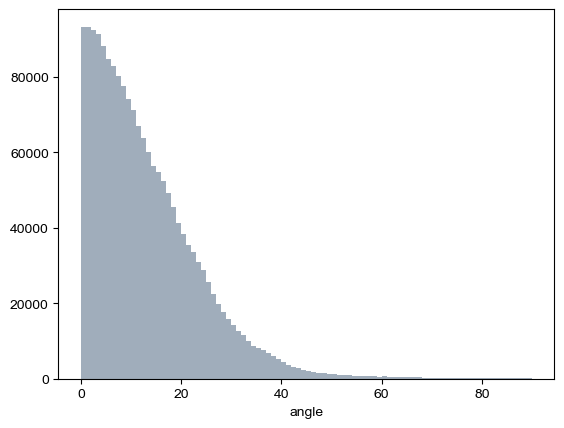

In [23]:
line_plot_homo = sns.distplot(
    df_homo["angle"], bins=90, color='#123456', label='angle',
    kde=False,
    rug=False
)


figure_homo = line_plot_homo.get_figure()
figure_homo.savefig("homo_hist.png", format="png", dpi=500)



C:\Users\nokai\AppData\Local\Temp\ipykernel_10880\228026902.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  line_plot_hetero = sns.distplot(


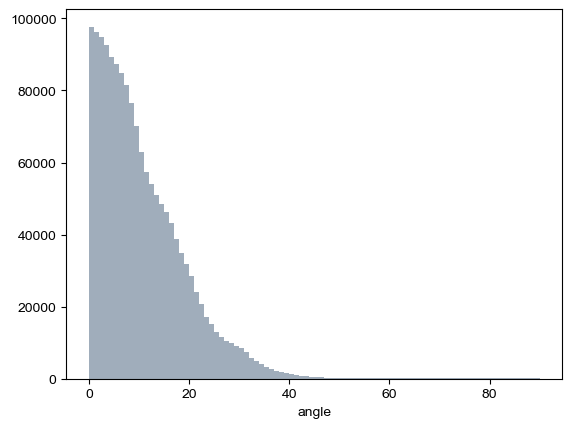

In [24]:
line_plot_hetero = sns.distplot(
    df_hetero["angle"], bins=90, color='#123456', label='angle',
    kde=False,
    rug=False
)

figure_hetero = line_plot_hetero.get_figure()
figure_hetero.savefig("hetero_hist.png", format="png", dpi=500)



C:\Users\nokai\AppData\Local\Temp\ipykernel_10880\3633754158.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  line_plot_csh = sns.distplot(


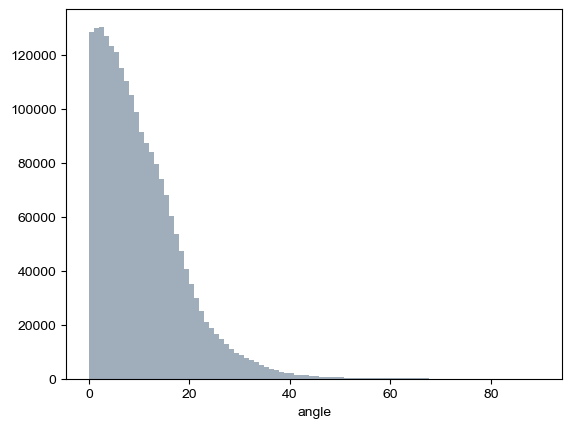

In [25]:
line_plot_csh = sns.distplot(
    df_csh["angle"], bins=90, color='#123456', label='angle',
    kde=False,
    rug=False
)

figure_csh = line_plot_csh.get_figure()
figure_csh.savefig("csh_hist.png", format="png", dpi=500)

In [26]:
df_csh_25 = df_csh[df_csh["angle"]<=20]

In [27]:
under25ratio = len(df_csh_25)/len(df_csh)

In [28]:
print(under25ratio)

0.8792296650000375


In [29]:
def barplot_annotate_brackets(num1, num2, data, center, 
                              height, yerr=None, dh=.05, 
                              barh=.02, fs=15, maxasterix=None):
    """ 
    Annotate barplot with p-values.
  
    :param num1: number of left bar to put bracket over
    :param num2: number of right bar to put bracket over
    :param data: string to write or number for generating asterixes
    :param center: centers of all bars (like plt.bar() input)
    :param height: heights of all bars (like plt.bar() input)
    :param yerr: yerrs of all bars (like plt.bar() input)
    :param dh: height offset over bar / bar + yerr in axes coordinates (0 to 1)
    :param barh: bar height in axes coordinates (0 to 1)
    :param fs: font size
    :param maxasterix: maximum number of asterixes to write (for very small p-values)
    """
  
    if type(data) is str:
        text = data
    else:
        # * is p < 0.05
        # ** is p < 0.005
        # *** is p < 0.0005
        # etc.
        text = ''
        p = .05
  
        while data < p:
            text += '*'
            p /= 10.
  
            if maxasterix and len(text) == maxasterix:
                break
  
        if len(text) == 0:
            text = 'n.s.'
  
    lx, ly = center[num1], height[num1]
    rx, ry = center[num2], height[num2]
  
    if yerr:
        ly += yerr[num1]
        ry += yerr[num2]
  
    ax_y0, ax_y1 = plt.gca().get_ylim()
    dh *= (ax_y1 - ax_y0)
    barh *= (ax_y1 - ax_y0)
  
    y = max(ly, ry) + dh
  
    barx = [lx, lx, rx, rx]
    bary = [y, y, y, y]
    mid = ((lx+rx)/2, y+barh)
  
    plt.plot(barx, bary, c='black')
  
    kwargs = dict(ha='center', va='bottom')
    if fs is not None:
        kwargs['fontsize'] = fs
  
    plt.text(*mid, text, **kwargs)

C:\Users\nokai\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\seaborn\categorical.py:3540: UserWarning: 10.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\nokai\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\seaborn\categorical.py:3540: UserWarning: 10.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\nokai\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\seaborn\categorical.py:3540: UserWarning: 15.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


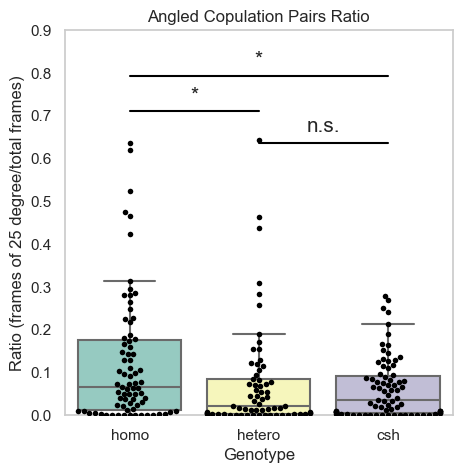

In [30]:
""" main """
# brunnermunzel test
t01_value, p01_value = brunnermunzel(df_an_homo["ratio"], df_an_hetero["ratio"])
t02_value, p02_value = brunnermunzel(df_an_homo["ratio"], df_an_csh["ratio"])
t03_value, p03_value = brunnermunzel(df_an_hetero["ratio"], df_an_csh["ratio"])

 
 
""" plot """
Q3_KO = df_an_homo["ratio"].quantile(.75)
Q3_hetero = df_an_hetero["ratio"].quantile(.75)
Q3_csh = df_an_csh["ratio"].quantile(.75)
heights = [Q3_KO, Q3_hetero, Q3_csh]
bars = np.arange(len(heights))

gap1 = [0.5, 0.5, 0.5]



%matplotlib inline

sns.set()
sns.set_style('whitegrid')
sns.set_palette('Set3')



plt.figure(figsize=(5, 5))

sns.boxplot(x = "genotype", y = "ratio", data=df_angle, sym="")
sns.swarmplot(x = "genotype", y = "ratio", data = df_angle, color='black', size=4)

barplot_annotate_brackets(0, 1, p01_value, bars,
                          heights, yerr=gap1)
barplot_annotate_brackets(0, 2, p02_value, bars,
                          heights, yerr=gap1, dh=0.15)
barplot_annotate_brackets(1, 2, p03_value, bars,
                          heights, yerr=gap1)


params = {'mathtext.default': 'regular' }    
values = ["$piezo^(-/-)"]

plt.rcParams.update(params)
plt.grid(False)
plt.ylim(0, 0.9)
plt.xlabel("Genotype")
plt.ylabel("Ratio (frames of 25 degree/total frames)")
plt.title("Angled Copulation Pairs Ratio")

# #ディレクトリーの移動
# os.chdir("C:/Users/NoukairoTaro/Desktop/python解析/3rd_DLC_cop_angle/csv")

# #グラフの保存
# jt = str(judge_sangle)
plt.savefig( "F_figure_piezoKO.png")


In [31]:
#Normality Test
print(stats.shapiro(df_an_homo["ratio"]))
print(stats.shapiro(df_an_hetero["ratio"]))
print(stats.shapiro(df_an_csh["ratio"]))

ShapiroResult(statistic=0.78429114818573, pvalue=4.0023415692758135e-09)
ShapiroResult(statistic=0.6378716230392456, pvalue=1.7433618784701288e-11)
ShapiroResult(statistic=0.8276528120040894, pvalue=4.15468512926509e-08)


In [32]:
#test of equivariance
stats.bartlett(df_an_homo["ratio"], df_an_hetero["ratio"], df_an_csh["ratio"])


BartlettResult(statistic=38.803342765825406, pvalue=3.749394851525247e-09)

In [33]:
p_ratio_homo_hetero = brunnermunzel(df_an_homo["ratio"], df_an_hetero["ratio"])
p_ratio_homo_csh = brunnermunzel(df_an_homo["ratio"], df_an_csh["ratio"])
p_ratio_hetero_csh = brunnermunzel(df_an_hetero["ratio"], df_an_csh["ratio"])
print(p_ratio_homo_hetero)
print(p_ratio_homo_csh)
print(p_ratio_hetero_csh)

BrunnerMunzelResult(statistic=-2.616735084651786, pvalue=0.009861656929877395)
BrunnerMunzelResult(statistic=-2.564095680291341, pvalue=0.01137510968661602)
BrunnerMunzelResult(statistic=0.3695309602026428, pvalue=0.7123032947302548)


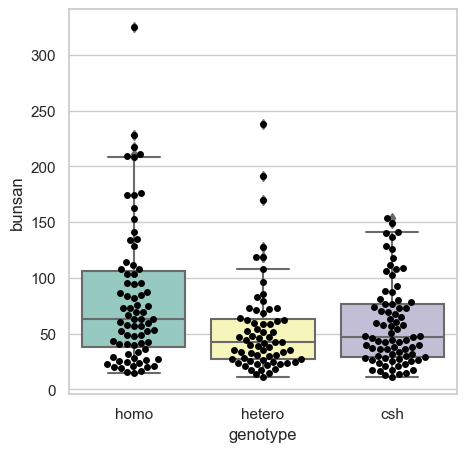

In [34]:

%matplotlib inline

sns.set()
sns.set_style('whitegrid')
sns.set_palette('Set3')

plt.figure(figsize=(5, 5))

sns.boxplot(x = "genotype", y = "bunsan", data=df_angle)
sns.swarmplot(x = "genotype", y = "bunsan", data = df_angle, color='black')

#os.chdir("C:/Users/NoukairoTaro/Desktop/python解析/3rd_DLC_cop_angle/csv")
#df_angle.to_csv("piezoKO_Kurtosisjudge.csv")

plt.savefig( "figure_piezoKO_Kurtosispoint.png")


In [35]:
#No normality No equal dispersion
#lasting more than 2 frames
p_eve_homo_hetero = brunnermunzel(df_an_homo["bunsan"], df_an_hetero["bunsan"])
p_eve_homo_csh = brunnermunzel( df_an_hetero["bunsan"], df_an_csh["bunsan"])
p_eve_hetero_csh =brunnermunzel(df_an_homo["bunsan"], df_an_csh["bunsan"])
print(p_eve_homo_hetero)
print(p_eve_homo_csh)
print(p_eve_hetero_csh)

BrunnerMunzelResult(statistic=-3.0443924725353093, pvalue=0.002794967620194236)
BrunnerMunzelResult(statistic=0.9159255119942163, pvalue=0.36126619743008814)
BrunnerMunzelResult(statistic=-2.216726808227758, pvalue=0.028212218808600944)


<AxesSubplot:xlabel='genotype', ylabel='cop_mtime'>

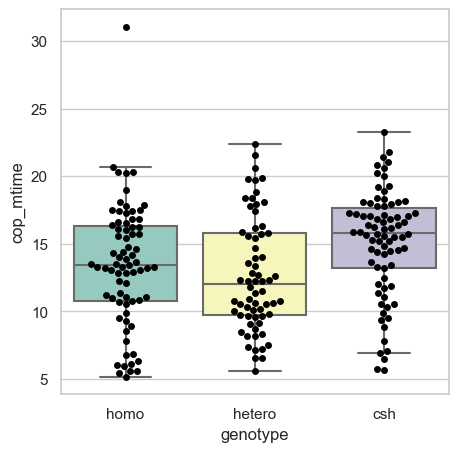

In [36]:
np.random.seed(0)

%matplotlib inline

sns.set()
sns.set_style('whitegrid')
sns.set_palette('Set3')

plt.figure(figsize=(5, 5))

sns.boxplot(x = "genotype", y = "cop_mtime", data=df_angle, sym="")
#横に広げてプロットしてみる
sns.swarmplot(x = "genotype", y = "cop_mtime", data = df_angle, color='black')



#ディレクトリーの移動
#os.chdir("C:/Users/NoukairoTaro/Desktop/python解析/re_DLC_cop_angle/csv")
#df_angle.to_csv("piezoKO_anglejudge.csv")

#plt.savefig( "F_figure_piezoKO_copulation_DLC_mtime.png")


In [37]:
p_m_homo_hetero = brunnermunzel(df_an_homo["cop_mtime"], df_an_hetero["cop_mtime"])
p_m_homo_csh = brunnermunzel( df_an_hetero["cop_mtime"], df_an_csh["cop_mtime"])
p_m_hetero_csh =brunnermunzel(df_an_homo["cop_mtime"], df_an_csh["cop_mtime"])
print(p_m_homo_hetero)
print(p_m_homo_csh)
print(p_m_hetero_csh)

BrunnerMunzelResult(statistic=-1.2455829250393258, pvalue=0.2150670528828334)
BrunnerMunzelResult(statistic=3.628501810350881, pvalue=0.0004078850852307081)
BrunnerMunzelResult(statistic=3.033692037709492, pvalue=0.0028460034330837214)


In [38]:
df_angle.to_csv('df_angle.csv')

In [39]:
#Ascending = False for sort descending order for raster plots
df_an_homo_s = df_an_homo.sort_values('angle_time', ascending=False)
#indexing rearrangement
df_an_homo_s = df_an_homo_s.reset_index(drop=True)
df_an_homo_s.to_csv('df_an_homo_s.csv')

df_an_hetero_s = df_an_hetero.sort_values('angle_time', ascending=False)
df_an_hetero_s = df_an_hetero_s.reset_index(drop=True)

df_an_csh_s = df_an_csh.sort_values('angle_time', ascending=False)
df_an_csh_s = df_an_csh_s.reset_index(drop=True)

In [40]:
#Import and concatenate CSVs
csvs = glob.glob("C:/Users/nokai/Desktop/piezo_data_analysis/R_analysis/csv/piezo_copulation_info.csv")
df = pd.DataFrame()
col_n = ["name", "genotype", "movie_name", "cop_or_not", "copulation_duration_min", "copulation_duration_sec", "no_pupae"]


dfs = []
for csv in natsorted(csvs):
    dfs += [pd.read_csv(csv, header=None, skiprows=1, names = col_n).fillna(int(99))]
df = fast_concat(dfs)

df_dur_info = fast_concat(dfs)
indexNames = df_dur_info[ (df_dur_info['copulation_duration_min'] == int(99))].index
df_dur_info.drop(indexNames , inplace=True)

df_dur_info.to_csv('df_trye.csv')
df_dur_info["copulation_duration_min"].astype(int)
df_dur_info["copulation_duration_sec"].astype(int)

df_dur_info["fin_frame"] = (df_dur_info["copulation_duration_min"] * 60 * 30) + (df_dur_info["copulation_duration_sec"] * 30)

df_dur_info_homo = df_dur_info.query('genotype == "homo"')
fin_m = len(df_dur_info_homo)+1
df_dur_info_homo.loc[:, ('class')] = np.arange(1, fin_m)

df_dur_info_hetero = df_dur_info.query('genotype == "hetero"')
fin_t = len(df_dur_info_hetero)+1
df_dur_info_hetero.loc[:, ('class')] = np.arange(1, fin_t)

df_dur_info_csh = df_dur_info.query('genotype == "csh"')
fin_c = len(df_dur_info_csh)+1
df_dur_info_csh.loc[:, ('class')] = np.arange(1, fin_c)

C:\Users\nokai\AppData\Local\Temp\ipykernel_10880\1545732917.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dur_info_homo.loc[:, ('class')] = np.arange(1, fin_m)
C:\Users\nokai\AppData\Local\Temp\ipykernel_10880\1545732917.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dur_info_hetero.loc[:, ('class')] = np.arange(1, fin_t)
C:\Users\nokai\AppData\Local\Temp\ipykernel_10880\1545732917.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

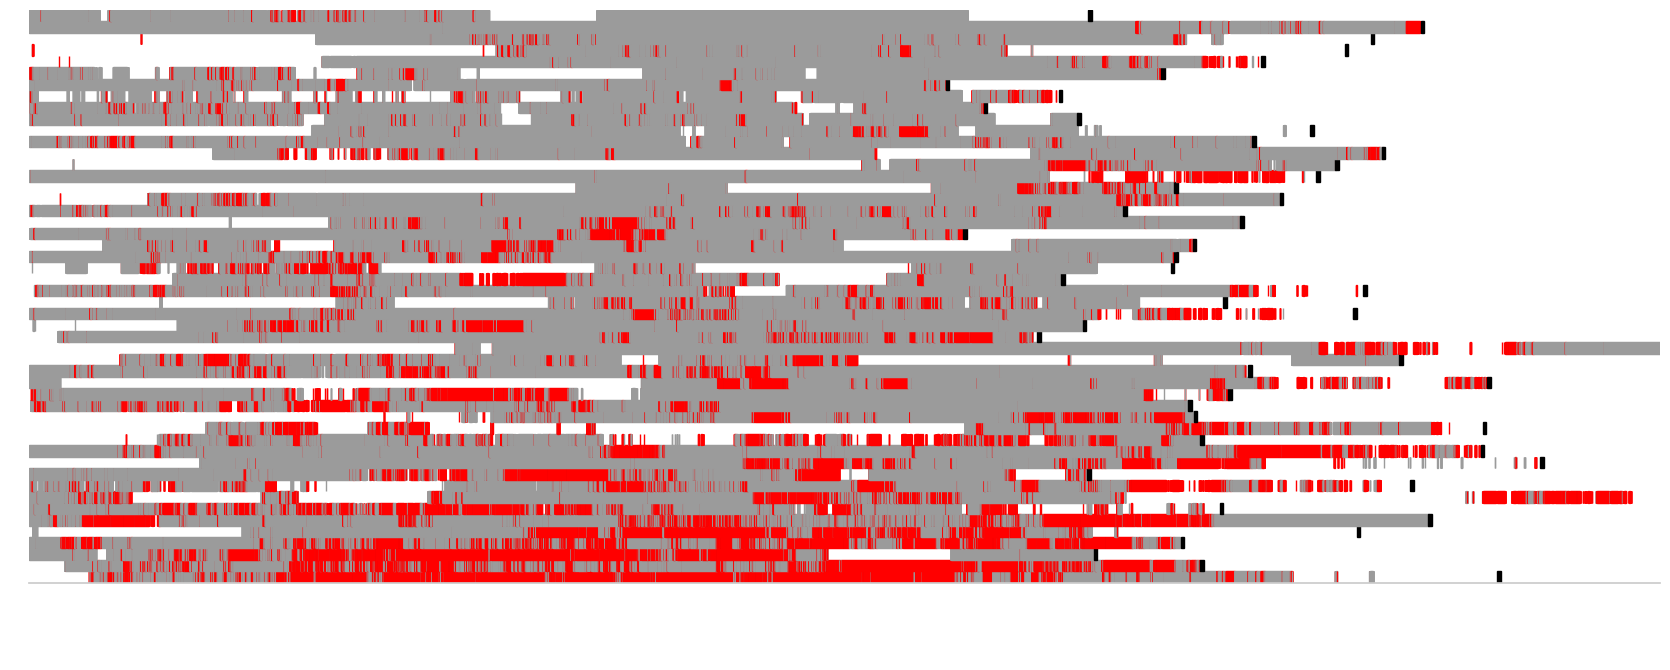

In [41]:
%matplotlib inline
import matplotlib.patches as patches

#Prepare the groundwork for the figure
fig = plt.figure(figsize=(18, 8))
ax = fig.add_subplot(1, 1, 1)

wval = 1   #30 fps, so the formula to convert to minits


#ethogram
ca = 0
ct = 0
cl = 0


for i in range(50):
    #Describe the raster plots in order of tilt time
    ct = df_an_homo_s.at[df_an_homo_s.index[ca], "Class"]
    ca = ca + 1
    df2_homo = df_homo_raw[df_homo_raw["Class"] == str(ct) ]
    n = 1
    cop_t = df2_homo["angle"].count()
    
    #Only handle data over a certain amount of time
    if  cop_t >= ju_tt:
    
        for t in range (len(df2_homo)):

            if float(df2_homo.at[df2_homo.index[n-1],'angle']) >= float(25):
                a = patches.Rectangle(xy=(df2_homo.at[df2_homo.index[n-1],'frame'], cl), width=wval, height=1, color="#ff0000")
                ax.add_patch(a)
            else:
                b = patches.Rectangle(xy=(df2_homo.at[df2_homo.index[n-1],'frame'], cl), width=wval, height=1, color="#9b9b9b")
                ax.add_patch(b)
            n = n + 1
            
        #the end of copulation
        df = df_dur_info_homo[df_dur_info_homo["class"] == int(ct)]
        dur_time = df.at[df.index[0],"fin_frame"]
        c = plt.Rectangle(xy=(dur_time, cl), width=100, height=1, color="#000000")
        ax.add_patch(c)
        cl = cl + 1
        
plt.rcParams["font.size"] = 50
plt.grid(False)
# plt.axis('scaled')
plt.xlim([0,45000])
plt.ylim([0,50])
plt.xticks([0, 9000, 18000, 27000, 36000], ["0", "5", "10", "15", "20"], fontsize=50, color = "w") #追加
# plt.yticks(np.arange(10, 51, step=10), fontsize=50)  #追加
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
plt.tick_params(left = False, labelleft = False)
# plt.xlabel("Time (min)", fontsize=50)
# plt.ylabel("Fly #", fontsize=100)
# plt.title("$piezo^{KO}$", fontstyle="italic", fontsize=100)


plt.tight_layout()


plt.savefig( "../figure_python/figure_homo_ethogram.png", format = "png", dpi = 300)

In [ ]:
%matplotlib inline
import matplotlib.patches as patches

#図の下地を作成
fig = plt.figure(figsize=(18, 8))
ax = fig.add_subplot(1, 1, 1)

wval = 1  

ca = 0
ct = 0
cl = 0


for i in range(50):
    
    ct = df_an_hetero_s.at[df_an_hetero_s.index[ca], "Class"]
    ca = ca + 1
    df2_hetero = df_hetero_raw[df_hetero_raw["Class"] == str(ct) ]
    n = 1
    cop_t = df2_hetero["angle"].count()
    
    if  cop_t >= ju_tt:
    
        for t in range (len(df2_hetero)):

            if float(df2_hetero.at[df2_hetero.index[n-1],'angle']) >= float(25):
                a = patches.Rectangle(xy=(df2_hetero.at[df2_hetero.index[n-1],'frame'], cl), width=wval, height=1, color="#ff0000")
                ax.add_patch(a)
            else:
                b = patches.Rectangle(xy=(df2_hetero.at[df2_hetero.index[n-1],'frame'], cl), width=wval, height=1, color="#9b9b9b")
                ax.add_patch(b)
            n = n + 1
            
        df = df_dur_info_hetero[df_dur_info_hetero["class"] == int(ct)]
        dur_time = df.at[df.index[0],"fin_frame"]
        c = plt.Rectangle(xy=(dur_time, cl), width=100, height=1, color="#000000")
        ax.add_patch(c)
        cl = cl + 1
        
plt.rcParams["font.size"] = 50
plt.grid(False)
# plt.axis('scaled')
plt.xlim([0,45000])
plt.ylim([0,50])
plt.xticks([0, 9000, 18000, 27000, 36000], ["0", "5", "10", "15", "20"], fontsize=50, color = "w") #追加
# plt.yticks(np.arange(10, 51, step=10), fontsize=50)  #追加
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
plt.tick_params(left = False, labelleft = False)
# plt.xlabel("Time (min)", fontsize=50)
# plt.ylabel("Fly #", fontsize=100)
# plt.title("$piezo^{KO/+}$", fontstyle="italic", fontsize=100)

plt.tight_layout()


plt.savefig( "../figure_python/figure_hetero_ethogram.png", format = "png", dpi = 300)


In [ ]:
%matplotlib inline
import matplotlib.patches as patches

#図の下地を作成
fig = plt.figure(figsize=(18, 8))
ax = fig.add_subplot(1, 1, 1)

wval = 1


ca = 0
ct = 0
cl = 0


for i in range(50):

    ct = df_an_csh_s.at[df_an_csh_s.index[ca], "Class"]
    ca = ca + 1
    df2_csh = df_csh_raw[df_csh_raw["Class"] == str(ct) ]
    n = 1
    cop_t = df2_csh["angle"].count()
    
    if  cop_t >= ju_tt:
    
        for t in range (len(df2_csh)):

            if float(df2_csh.at[df2_csh.index[n-1],'angle']) >= float(25):
                a = patches.Rectangle(xy=(df2_csh.at[df2_csh.index[n-1],'frame'], cl), width=wval, height=1, color="#ff0000")
                ax.add_patch(a)
            else:
                b = patches.Rectangle(xy=(df2_csh.at[df2_csh.index[n-1],'frame'], cl), width=wval, height=1, color="#9b9b9b")
                ax.add_patch(b)
            n = n + 1

        df = df_dur_info_csh[df_dur_info_csh["class"] == int(ct)]
        dur_time = df.at[df.index[0],"fin_frame"]
        c = plt.Rectangle(xy=(dur_time, cl), width=100, height=1, color="#000000")
        ax.add_patch(c)
        cl = cl + 1
        
plt.rcParams["font.size"] = 50
plt.grid(False)
# plt.axis('scaled')
plt.xlim([0,45000])
plt.ylim([0,50])
plt.xticks([0, 9000, 18000, 27000, 36000], ["0", "5", "10", "15", "20"], fontsize=50, color = "w") #追加
# plt.yticks(np.arange(10, 51, step=10), fontsize=50)  #追加
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
plt.tick_params(left = False, labelleft = False)
# plt.xlabel("Time (min)", fontsize=50)
# plt.ylabel("Fly #", fontsize=100)
# plt.title("$Canton-S$", fontstyle="italic", fontsize=100)

plt.tight_layout()


plt.savefig( "../figure_python/figure_csh_ethogram.png", format = "png", dpi = 300)
